In [ ]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

In [2]:
from distgen.generator import Generator
from distgen.plot import plot_2d, plot_1d, plot_current_profile
from matplotlib import pyplot as plt
import yaml

In [3]:
gen = Generator(verbose=0) 
units = {"x":"mm","y":"mm","px":"keV/c","py":"keV/c","t":"ps","q":"pC"}

# Radial Distributions

Dictionary Input:
r_dist: {'type': 'radial_uniform', 'params': {'min_r': {'value': 1, 'units': 'mm'}, 'max_r': {'value': 2, 'units': 'mm'}}}

YAML input:
r_dist:
  params:
    max_r:
      units: mm
      value: 2
    min_r:
      units: mm
      value: 1
  type: radial_uniform



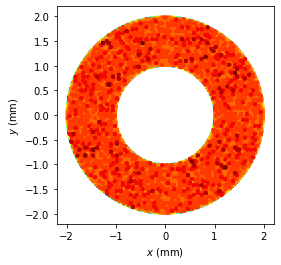

In [4]:
# Uniform radial distribution from min_r to max_r
gen=Generator('data/rad.uniform.in.json',verbose=0)
beam = gen.beam()

# X-Y Plot
plot_2d(beam,1,"x",units["x"],"y",units["y"],'scatter_hist2d',nbins=100,axis="equal");

print("Dictionary Input:")
print("r_dist:",gen.input["r_dist"])
print('\nYAML input:')
print(yaml.dump({'r_dist':gen.input["r_dist"]}))

User Input:
r_dist: {'type': 'rg', 'params': {'truncation_radius': {'value': 1, 'units': 'mm'}, 'truncation_fraction': {'value': 0.5, 'units': 'dimensionless'}}}

YAML input:
r_dist:
  params:
    truncation_fraction:
      units: dimensionless
      value: 0.5
    truncation_radius:
      units: mm
      value: 1
  type: rg



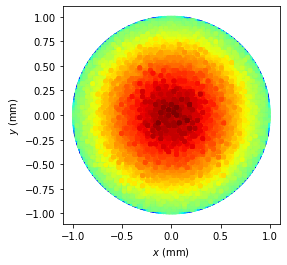

In [5]:
# Truncated radial gaussian distribution with pihole size of 2 mm, gaussian clipped at 50% intensity
gen=Generator('data/rad.trunc.gaussian.in.json',verbose=0)
beam = gen.beam()

print("User Input:")
print("r_dist:",gen.input["r_dist"])
print("\nYAML input:")
print(yaml.dump({'r_dist':gen.input["r_dist"]}))

# X-Y Plot
plot_2d(beam,1,"x",units["x"],"y",units["y"],'scatter_hist2d',nbins=75,axis="equal");

Dictionary Input:
r_dist: {'type': 'radial_gaussian', 'params': {'sigma_xy': {'value': 2, 'units': 'mm'}}}

YAML input:
r_dist:
  params:
    sigma_xy:
      units: mm
      value: 2
  type: radial_gaussian



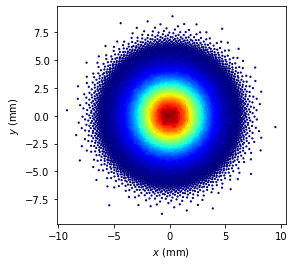

In [6]:
# Radial gaussian distribution with sigma_xy 2 mm
gen=Generator('data/rad.gaussian.in.json',verbose=0)

beam = gen.beam()

print("Dictionary Input:")
print("r_dist:",gen.input["r_dist"])

print("\nYAML input:")
print(yaml.dump({'r_dist':gen.input["r_dist"]}))

# X-Y Plot
plot_2d(beam,1,"x",units["x"],"y",units["y"],'scatter_hist2d',nbins=200,axis="equal");

In [8]:
# Radial distribution file: a radial gaussian with cuts in it
gen=Generator('data/rad.file.in.json', verbose=0)

beam = gen.beam()

print("User Input:")
print("r_dist:",gen.input["r_dist"])
print('\nYAML input:')
print(yaml.dump({'r_dist':gen.input["r_dist"]}))

# X-Y Plot
plot_2d(beam,1,"x",units["x"],"y",units["y"],'scatter_hist2d',nbins=200,axis="equal");

AssertionError: Unexpected beam parameter input species.

In [ ]:
# 2D XY distribution: Lase Image Example
# Real laser spot image - using 1 million particles (takes a few secs)
gen=Generator('data/laser.image.in.json',verbose=0)

beam = gen.beam()

print("Dictionary Input:")
print("xy_dist:",gen.input["xy_dist"])

print("\nYAML input:")
print(yaml.dump({'xy_dist':gen.input["xy_dist"]}))

# X-Y Plot
plot_2d(beam,1,"x",units["x"],"y",units["y"],'scatter_hist2d',nbins=100,axis="equal");

# In the file "laser.image.txt", the first row specfies: x range avg [units], the second the same for y:
# x   3.5002000e+00   0.0000000e+00 [mm]
# y   3.5002000e+00   0.0000000e+00 [mm] 
# The rest of the data is a rectangular equally spaced grid of rho(x,y)

In [ ]:
# Radial Tukey distribution
gen=Generator('data/tukey.beer.can.in.json',verbose=0)

beam = gen.beam()

print("Dictionary Input:")
print("r_dist:", gen.input["r_dist"])
print("\nYAML Input:")
print(yaml.dump({'r_dist':gen.input["r_dist"]}))

plot_2d(beam,1,"x",units["x"],"y",units["y"],'scatter_hist2d',nbins=100,axis="equal");

# Basic 1D Distributions: uniform, file 1D, and Gaussian 

In [ ]:
# Similar to plot_2d, plot_1d performs a 1D histogram of a beam coordinate

gen=Generator('data/x.uniform.y.file.t.gaussian.in.json',verbose=0)
beam = gen.beam()

print("Dictionary Input:")
print("x_dist:", gen.input["x_dist"])
print("\nYAML Input:")
print(yaml.dump({'x_dist':gen.input["x_dist"]}))

plot_1d(beam,"x",units["x"],nbins=100)

In [ ]:
print("User Input:")
print("y_dist:",gen.input["y_dist"])
print("\nYAML Input:")
print(yaml.dump({'y_dist':gen.input["y_dist"]}))
plot_1d(beam,"y",units["y"],nbins=50)

In [ ]:
print("Dictionary Input:")
print("t_dist:",gen.input["t_dist"])
print("\nYAML Input:")
print(yaml.dump({'t_dist':gen.input["t_dist"]}))

plot_1d(beam,"t",units["t"],nbins=100)

# Special Temporal Distributions

In [ ]:
# Pulse stacking using birefrigent crystals
gen=Generator('data/t.crystals.in.json',verbose=0)
beam = gen.beam()
print("Dictionary Input:")
print("t_dist:",gen.input["t_dist"])
print("\nYAML Input:")
print(yaml.dump({'t_dist':gen.input["t_dist"]}))
plot_current_profile(beam,1,units)

In [ ]:
# PDF from file
gen=Generator('data/t.file.json', verbose=0)

beam = gen.beam()

print("User Input:")
print("t_dist:",gen.input["t_dist"])
print("\nYAML Input:")
print(yaml.dump({'t_dist':gen.input["t_dist"]}))
plot_current_profile(beam,1,units)

In [ ]:
# Tukey distribution
gen=Generator('data/tukey.beer.can.in.json', verbose=0)
beam = gen.beam()

print("User Input:")
print("t_dist:",gen.input["t_dist"])
print("\nYAML Input:")
print(yaml.dump({'t_dist':gen.input["t_dist"]}))

plot_current_profile(beam,1,units)